In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
# globals
gauss_kernel = np.asarray([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 26, 24, 6], [1, 4, 6, 4, 1], [4, 16, 24, 16, 4]])
gauss_kernel_coefficient = 1 / 256

# functions
def _conv(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    # calculating output size
    output_height = img.shape[0] - kernel.shape[0] + 1
    output_width = img.shape[1] - kernel.shape[1] + 1
    output = np.zeros((output_height, output_width))

    for h_index in range(output_height):
        for w_index in range(output_width):
            output[h_index, w_index] = np.sum(img[h_index:(h_index+kernel.shape[0]), w_index:(w_index+kernel.shape[1])] * kernel)

    return output

def _expand_repeat(inp: np.ndarray) -> np.ndarray:
    return np.repeat(inp[:, :, np.newaxis], 3, axis=2)

def downsample(img_path, num_of_levels):
    imgs = []
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_exp = _expand_repeat(img)
    imgs.append(img_exp)
    for _ in range(num_of_levels):
        img_gauss_filtered = np.around(_conv(img, gauss_kernel_coefficient * gauss_kernel)).astype(int)
        img_gauss_filtered_exp = _expand_repeat(img_gauss_filtered)
        if img_gauss_filtered_exp.shape[0] % 2 == 0:
            idx_slice = list(range(1, img_gauss_filtered_exp.shape[0] + 1, 2))
        else:
            idx_slice = list(range(1, img_gauss_filtered_exp.shape[0], 2))

        img_downsample = img_gauss_filtered[idx_slice, :][:, idx_slice]
        img_downsample_exp = _expand_repeat(img_downsample)
        imgs.append(img_downsample_exp)
        img = img_downsample
    return imgs

def plot_save_imgs(imgs, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for idx in range(len(imgs)):
        plt.figure(figsize=(imgs[idx].shape[0]/300, imgs[idx].shape[1]/300), dpi=300)
        plt.axis('off')
        plt.imshow(imgs[idx])
        file_name = 'level_{}_{}_{}.png'.format(idx + 1, imgs[idx].shape[0], imgs[idx].shape[1])
        file_name = os.path.join(save_path, file_name)
        plt.savefig(file_name, bbox_inches='tight', pad_inches=0)

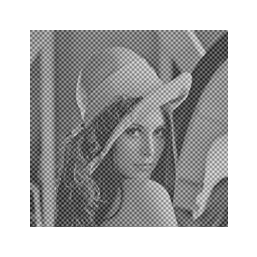

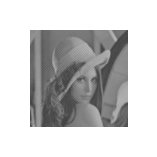

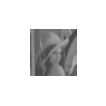

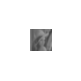

In [9]:
def main():
    imgs = downsample('./lena_gray_256_noisy.png', 3)
    plot_save_imgs(imgs, './downsampled_imgs/')

main()